# ROAD EXPLORATORY DATA ANALYSIS

Parts of EDA:
* Data Load 
* Exploratory Data Analysis
* Data Visualization

In [30]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

### Data Load

In [ ]:
xml_folder = "./../../data/raw/potholes/"
image_folder_potholes = "./../../data/raw/potholes/"
image_folder_normal = "./../../data/raw/normal/"

classes_count = Counter()
bounding_box_sizes = []
potholes_image = {}
normal_images = [] 

for xml_file in os.listdir(xml_folder):
    if xml_file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, xml_file)
        
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        filename = root.find('filename').text
        width = int(root.find('size/width').text)
        height = int(root.find('size/height').text)
        depth = int(root.find('size/depth').text)
        potholes_image[filename] = (width, height, depth)
        
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            classes_count[class_name] += 1
            
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            bounding_box_sizes.append((xmax - xmin, ymax - ymin))

for image_file in os.listdir(image_folder_normal):
    if image_file.endswith(('.jpg', '.png', '.jpeg')):
        normal_images.append(image_file)

print(f"Jumlah gambar jalan berlubang: {len(potholes_image)}")
print(f"Jumlah gambar jalan normal: {len(normal_images)}")

Jumlah gambar jalan berlubang: 500
Jumlah gambar jalan normal: 94


### Exploratory Data Analysis

In [41]:
print("Distribusi kelas (jumlah objek per kelas):")
for class_name, count in classes_count.items():
    print(f"{class_name}: {count} objek")

bounding_box_widths = [size[0] for size in bounding_box_sizes]
bounding_box_heights = [size[1] for size in bounding_box_sizes]

print("\nStatistik bounding box potholes:")
print(f"Jumlah gambar: {len(potholes_image)}")
print(f"Rata-rata Lebar: {np.mean(bounding_box_widths):.2f}")
print(f"Rata-rata Tinggi: {np.mean(bounding_box_heights):.2f}")
print(f"Lebar Minimal: {np.min(bounding_box_widths)}, Lebar Maksimal: {np.max(bounding_box_widths)}")
print(f"Tinggi Minimal: {np.min(bounding_box_heights)}, Tinggi Maksimal: {np.max(bounding_box_heights)}")

normal_image_widths = []
normal_image_heights = []

for normal_image in normal_images:
    img_path = os.path.join(image_folder_normal, normal_image)
    with Image.open(img_path) as img:
        normal_image_widths.append(img.width)
        normal_image_heights.append(img.height)

print("\nStatistik gambar jalan normal:")
print(f"Jumlah gambar: {len(normal_images)}")
print(f"Rata-rata Lebar: {np.mean(normal_image_widths):.2f}")
print(f"Rata-rata Tinggi: {np.mean(normal_image_heights):.2f}")
print(f"Lebar Minimal: {np.min(normal_image_widths)}, Lebar Maksimal: {np.max(normal_image_widths)}")
print(f"Tinggi Minimal: {np.min(normal_image_heights)}, Tinggi Maksimal: {np.max(normal_image_heights)}")

Distribusi kelas (jumlah objek per kelas):
pothole: 336 objek
pothole_water: 418 objek
damage: 213 objek
crack: 75 objek
pothole_water_m: 61 objek

Statistik bounding box potholes:
Jumlah gambar: 500
Rata-rata Lebar: 322.04
Rata-rata Tinggi: 163.99
Lebar Minimal: 39, Lebar Maksimal: 2506
Tinggi Minimal: 17, Tinggi Maksimal: 1581

Statistik gambar jalan normal:
Jumlah gambar: 94
Rata-rata Lebar: 1077.45
Rata-rata Tinggi: 1436.60
Lebar Minimal: 960, Lebar Maksimal: 1200
Tinggi Minimal: 1280, Tinggi Maksimal: 1600


### Data Visualization

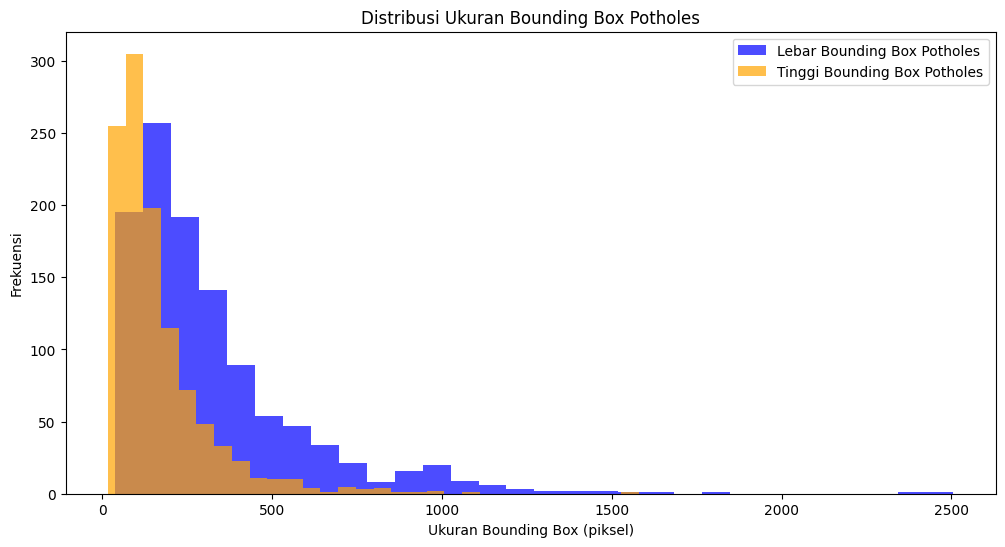

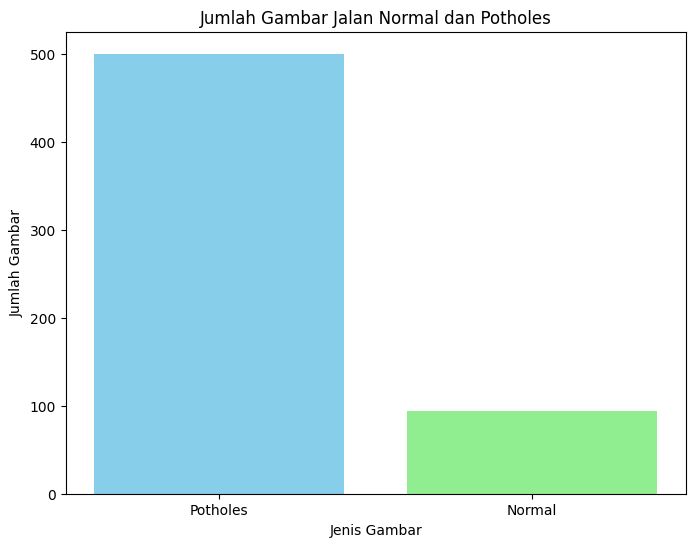

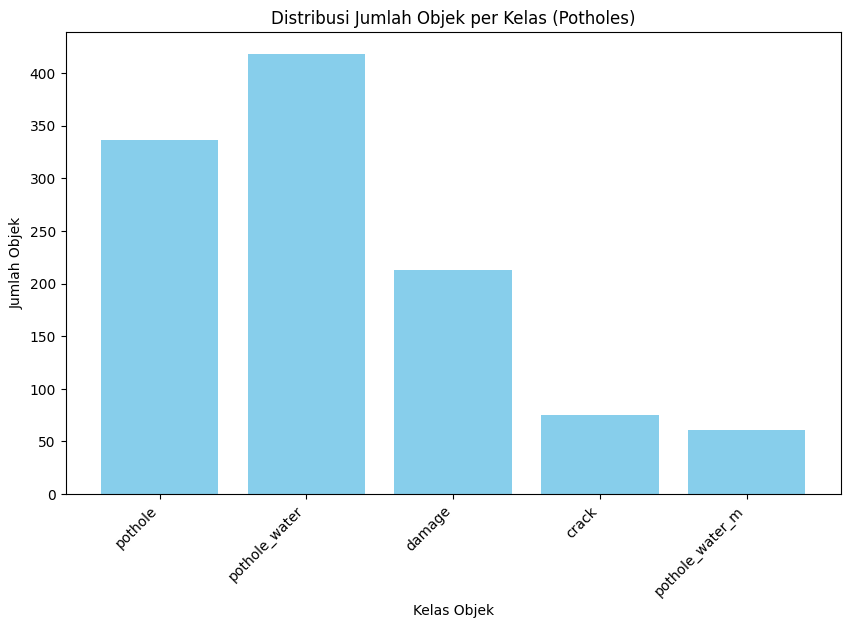

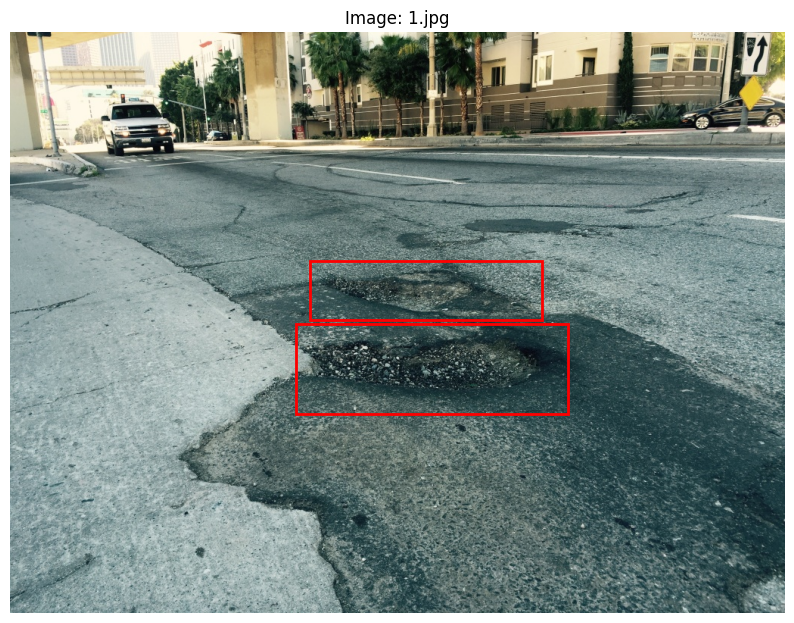

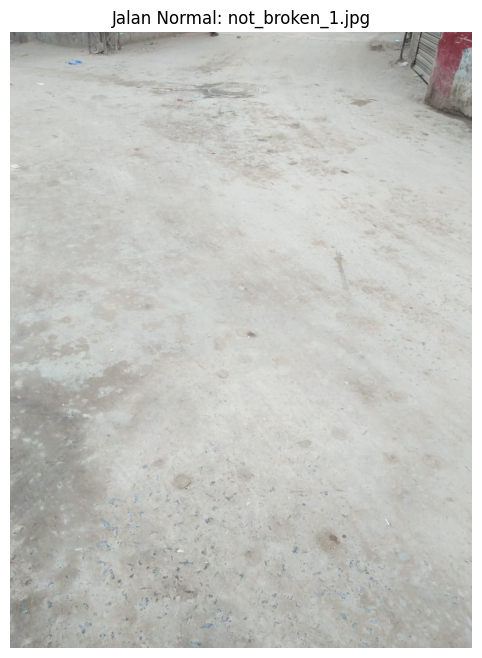

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(bounding_box_widths, bins=30, alpha=0.7, color='blue', label='Lebar Bounding Box Potholes')
plt.hist(bounding_box_heights, bins=30, alpha=0.7, color='orange', label='Tinggi Bounding Box Potholes')
plt.xlabel("Ukuran Bounding Box (piksel)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Ukuran Bounding Box Potholes")
plt.legend()
plt.show()

image_counts = {'Potholes': len(potholes_image), 'Normal': len(normal_images)}

plt.figure(figsize=(8, 6))
plt.bar(image_counts.keys(), image_counts.values(), color=['skyblue', 'lightgreen'])
plt.xlabel("Jenis Gambar")
plt.ylabel("Jumlah Gambar")
plt.title("Jumlah Gambar Jalan Normal dan Potholes")
plt.show()

classes = list(classes_count.keys())
counts = list(classes_count.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel("Kelas Objek")
plt.ylabel("Jumlah Objek")
plt.title("Distribusi Jumlah Objek per Kelas (Potholes)")
plt.xticks(rotation=45, ha='right')
plt.show()

def show_image_with_bboxes(filename):
    img_path = os.path.join(image_folder_potholes, filename)
    xml_path = os.path.join(xml_folder, filename.replace('.jpg', '.xml'))
    
    with Image.open(img_path) as img:
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for obj in root.findall('object'):
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)
            xmax = int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)
            
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                              linewidth=2, edgecolor='red', facecolor='none'))
        
        plt.title(f"Image: {filename}")
        plt.axis('off')
        plt.show()

sample_images_potholes = list(potholes_image.keys())[:1]
for sample_image in sample_images_potholes:
    show_image_with_bboxes(sample_image)

def show_normal_image(filename):
    img_path = os.path.join(image_folder_normal, filename)
    
    with Image.open(img_path) as img:
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f"Jalan Normal: {filename}")
        plt.axis('off')
        plt.show()

sample_images_normal = normal_images[:1]
for sample_image in sample_images_normal:
    show_normal_image(sample_image)